In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random 


In [58]:
df=pd.read_csv("/dshome/WoongLab/heo/imbalance_wine/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [59]:
df.shape

(1599, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [61]:
def y_label_count(df):
    colors=['lightsteelblue','#FD9F31']
    wedgeprops={'width':0.7, 'edgecolor': 'k', 'linewidth':0.75}
    plt.subplots(figsize=(8,8))
    plt.title('Ratio of Y_LABEL in Total Data', fontsize=20, fontdict={'weight':'bold'})
    plt.rc('font', size=12)
    labels=['0','1']
    plt.pie(df['quality'].value_counts(),
            autopct="%.2f%%",shadow=True,startangle=90, textprops={'fontsize':15},
            colors=colors, wedgeprops=wedgeprops, labels=labels)
    plt.tight_layout()
    plt.show()
    
    print('전체 데이터 수:', len(df['quality']))
    print('전체 데이터 중 품질이 좋은 와인의  수: ', df['quality'].value_counts()[0])
    print('전체 데이터 중 품질이 안좋은 와인의 수: ', df['quality'].value_counts()[1])

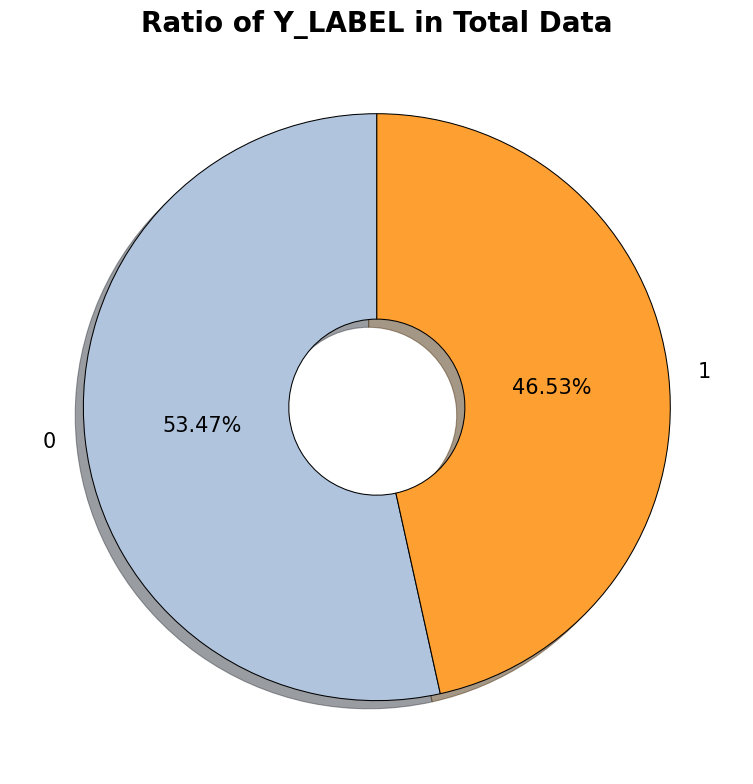

전체 데이터 수: 1599
전체 데이터 중 품질이 좋은 와인의  수:  855
전체 데이터 중 품질이 안좋은 와인의 수:  744


In [62]:
y_label_count(df)

In [63]:
df['quality'] = df['quality'].map({'good':0, 'bad':1})

In [64]:
df['quality'].value_counts()

0    855
1    744
Name: quality, dtype: int64

In [65]:
df_good=df[df['quality']==0].reset_index(drop=True)
train_data_good=df_good.loc[0:654,:]
df_bad=df[df['quality']==1].reset_index(drop=True)
train_data_bad=df_bad.loc[0:543,:]
train_data=pd.concat([train_data_good,train_data_bad])

In [66]:
train_data_good

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
1,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,0
2,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,0
3,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,0
4,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
650,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,0
651,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,0
652,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,0
653,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,0


In [67]:
val_data_good=df_good.loc[655:754,:]
val_data_bad=df_bad.loc[544:643,:]
val_data=pd.concat([val_data_good,val_data_bad])

In [68]:
val_data_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 544 to 643
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         100 non-null    float64
 1   volatile acidity      100 non-null    float64
 2   citric acid           100 non-null    float64
 3   residual sugar        100 non-null    float64
 4   chlorides             100 non-null    float64
 5   free sulfur dioxide   100 non-null    float64
 6   total sulfur dioxide  100 non-null    float64
 7   density               100 non-null    float64
 8   pH                    100 non-null    float64
 9   sulphates             100 non-null    float64
 10  alcohol               100 non-null    float64
 11  quality               100 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 9.5 KB


In [69]:
test_data_good=df_good.loc[755:,:]
test_data_bad=df_bad.loc[644:,:]
test_data=pd.concat([test_data_good,test_data_bad])

In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 755 to 743
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         200 non-null    float64
 1   volatile acidity      200 non-null    float64
 2   citric acid           200 non-null    float64
 3   residual sugar        200 non-null    float64
 4   chlorides             200 non-null    float64
 5   free sulfur dioxide   200 non-null    float64
 6   total sulfur dioxide  200 non-null    float64
 7   density               200 non-null    float64
 8   pH                    200 non-null    float64
 9   sulphates             200 non-null    float64
 10  alcohol               200 non-null    float64
 11  quality               200 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 20.3 KB


In [72]:
train_data.to_csv('/dshome/WoongLab/heo/imbalance_wine/dataset/train_wine.csv',index=False)

In [73]:
val_data.to_csv('/dshome/WoongLab/heo/imbalance_wine/dataset/val_wine.csv',index=False)
test_data.to_csv('/dshome/WoongLab/heo/imbalance_wine/dataset/test_wine.csv',index=False)